In [3]:
import torch 
from torch.autograd import Variable 

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]])) 
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]])) 

class LinearRegressionModel(torch.nn.Module): 

    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1) # One in and one out 

    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 

In [26]:
# our model 
our_model = LinearRegressionModel() 

criterion = torch.nn.MSELoss(size_average = False) 
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01) 
losses = []

for epoch in range(10): 

    # Forward pass: Compute predicted y by passing 
    # x to the model 
    pred_y = our_model(x_data) 

    # Compute and print loss 
    loss = criterion(pred_y, y_data) 

    # Zero gradients, perform a backward pass, 
    # and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    losses.append(loss)
    print('epoch {}, loss {}'.format(epoch, loss))

# Check how we do on an unseen value (test)
new_var = Variable(torch.Tensor([[4.0]])) 
pred_y = our_model(new_var) 
print("predict (after training)", 4, our_model(new_var).data[0][0]) 


epoch 0, loss 34.49501419067383
epoch 1, loss 15.361690521240234
epoch 2, loss 6.8440022468566895
epoch 3, loss 3.0520896911621094
epoch 4, loss 1.3639627695083618
epoch 5, loss 0.6123796105384827
epoch 6, loss 0.2777223289012909
epoch 7, loss 0.1286688894033432
epoch 8, loss 0.06224194914102554
epoch 9, loss 0.03259953483939171
predict (after training) 4 tensor(7.7891)


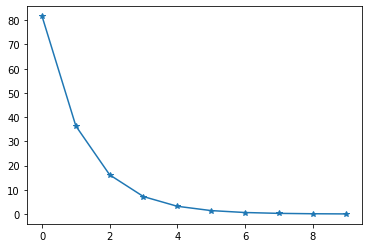

In [24]:
from matplotlib import pyplot as plt
plt.plot(losses,'-*')